In [1]:
import urllib
import urllib.request
import geopandas as gpd
import pandas as pd

In [1]:
#mapbox上申请的密钥
ACCESS_TOKEN=''

# 单个爬取

In [6]:
url='https://api.mapbox.com/isochrone/v1/mapbox/walking/121.483675%2C31.233764?contours_minutes=15&polygons=true&access_token='+ACCESS_TOKEN

In [7]:
#抓取
request=urllib.request.Request(url)
response=urllib.request.urlopen(request)
data=response.read().decode('utf-8')
data

'{"features":[{"properties":{"fillOpacity":0.33,"fill-opacity":0.33,"opacity":0.33,"fillColor":"#bf4040","fill":"#bf4040","color":"#bf4040","contour":15},"geometry":{"coordinates":[[[121.480716,31.244805],[121.478675,31.243093],[121.478756,31.241683],[121.477706,31.241733],[121.476531,31.239908],[121.473646,31.237764],[121.473171,31.235764],[121.471901,31.233538],[121.472187,31.230764],[121.471508,31.229764],[121.473525,31.228764],[121.473279,31.227764],[121.473675,31.22732],[121.476864,31.225953],[121.478675,31.224667],[121.479675,31.225931],[121.481389,31.224478],[121.485675,31.223229],[121.486675,31.225446],[121.487675,31.224897],[121.489785,31.226654],[121.491675,31.22754],[121.492833,31.227606],[121.494097,31.229764],[121.492518,31.231607],[121.492281,31.23337],[121.490675,31.233611],[121.490433,31.234522],[121.489603,31.234692],[121.489473,31.235562],[121.488614,31.235703],[121.488288,31.237377],[121.487553,31.237764],[121.487368,31.239457],[121.486497,31.239764],[121.486439,31.2

In [8]:
f=open('data.json',mode='w')
f.write(data)
f.close()

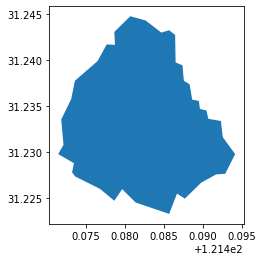

In [9]:
df=gpd.read_file('data.json')
df.plot()

In [25]:
df.to_file(r'C:\Users\飘哥\Desktop\上海行政区\等时圈\市中心.shp',encoding='utf-8')

In [11]:
type(df)

geopandas.geodataframe.GeoDataFrame

# 批量爬取

In [4]:
df=pd.read_csv(r'C:\Users\飘哥\Desktop\地铁站经纬度.csv',encoding='gb2312')
df

,name,categories,街镇名,lat,lng
0,江杨北路,居住区,杨行镇,31.409674,121.435220
1,铁力路,混合区,杨行镇,31.409685,121.456757
2,美兰湖,居住区,罗店镇,31.403678,121.345334
3,友谊路,混合区,友谊路街道,31.406039,121.471343
4,富锦路,居住区,杨行镇,31.394078,121.420009
...,...,...,...,...,...
315,临港大道,混合区,申港街道,30.925876,121.906772
316,滴水湖,混合区,申港街道,30.909291,121.925831
317,野生动物园,居住区,宣桥镇,31.052450,121.695519
318,醉白池,居住区,岳阳街道,31.003732,121.224626


In [5]:
#walking步行,driving驾车,cycling单车
def get_circle(lng,lat):
    url='https://api.mapbox.com/isochrone/v1/mapbox/walking/'+str(lng)+'%2C'+str(lat)+'?contours_minutes=15&polygons=true&access_token='+ACCESS_TOKEN
    #抓取
    request=urllib.request.Request(url)
    response=urllib.request.urlopen(request)
    data=response.read().decode('utf-8')
    f=open('data.json',mode='w')
    f.write(data)
    f.close()
    data=gpd.read_file('data.json')
    return data

In [87]:
final=[]
for i in range(0,len(df)):
    result=get_circle(df.lng[i],df.lat[i])
    result['name']=df.name[i]
    final.append(result)    
final=pd.concat(final,0)
final

,fillOpacity,fill-opacity,opacity,fillColor,fill,color,contour,geometry,name
0,0.33,0.33,0.33,#bf4040,#bf4040,#bf4040,15,"POLYGON ((121.43064 31.41909, 121.43022 31.419...",江杨北路
0,0.33,0.33,0.33,#bf4040,#bf4040,#bf4040,15,"POLYGON ((121.45118 31.41811, 121.44900 31.418...",铁力路
0,0.33,0.33,0.33,#bf4040,#bf4040,#bf4040,15,"POLYGON ((121.35348 31.40983, 121.35274 31.409...",美兰湖
0,0.33,0.33,0.33,#bf4040,#bf4040,#bf4040,15,"POLYGON ((121.46459 31.41529, 121.46334 31.415...",友谊路
0,0.33,0.33,0.33,#bf4040,#bf4040,#bf4040,15,"POLYGON ((121.41836 31.40543, 121.41801 31.405...",富锦路
...,...,...,...,...,...,...,...,...,...
0,0.33,0.33,0.33,#bf4040,#bf4040,#bf4040,15,"POLYGON ((121.89913 30.93424, 121.89741 30.934...",临港大道
0,0.33,0.33,0.33,#bf4040,#bf4040,#bf4040,15,"POLYGON ((121.93484 30.91630, 121.93383 30.915...",滴水湖
0,0.33,0.33,0.33,#bf4040,#bf4040,#bf4040,15,"POLYGON ((121.69572 31.06266, 121.69524 31.062...",野生动物园
0,0.33,0.33,0.33,#bf4040,#bf4040,#bf4040,15,"POLYGON ((121.22392 31.01503, 121.22363 31.015...",醉白池


In [88]:
final.to_file(r'C:\Users\飘哥\Desktop\上海行政区\等时圈\15分钟等时圈.shp',encoding='utf-8')